# Submission Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Muhammad Rizq Ramadhan
- Email: rizq.ramadhan17@gmail.com
- Id Dicoding: 3219478

## Persiapan

### Menyiapkan library yang dibutuhkan

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Menyiapkan data yang akan digunakan

## Data Understanding

In [81]:
df = pd.read_csv('data.csv', sep=';')

In [82]:
pd.set_option("display.max_columns", None)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

terdapat kesalahan tipe data pada 'Curricular_units_2nd_sem_grade' dan 'Curricular_units_1st_sem_grade' kedua column tersebut harusnya float64, namun akan diperbaiki pada data preparation.

In [84]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800,NaN,NaN,NaN,NaN,NaN,785,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,718,NaN,NaN,NaN,NaN,NaN,870,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,NaN,0.137658,0.541817,6.232143,8.063291,4.435805,NaN,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,NaN,0.690880,1.918546,2.195951,3.947951,3.014764,NaN,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,NaN,0.000000,0.000000,5.000000,6.000000,2.000000,NaN,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,NaN,0.000000,0.000000,6.000000,8.000000,5.000000,NaN,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,NaN,0.000000,0.000000,7.000000,10.000000,6.000000,NaN,0.000000,13.900000,2.600000,1.790000,NaN


In [85]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


tidak ada missing ada pada datasetnya.

In [86]:
df.head(3)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.0,0,0,6,6,6,13.666.666.666.666.600,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.0,0,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout


In [87]:
df.Curricular_units_2nd_sem_grade

0                          0.0
1       13.666.666.666.666.600
2                          0.0
3                         12.4
4                         13.0
                 ...          
4419    12.666.666.666.666.600
4420                      11.0
4421                      13.5
4422                      12.0
4423                      13.0
Name: Curricular_units_2nd_sem_grade, Length: 4424, dtype: object

In [88]:
df.Curricular_units_1st_sem_grade

0                          0.0
1                         14.0
2                          0.0
3       13.428.571.428.571.400
4       12.333.333.333.333.300
                 ...          
4419                      13.6
4420                      12.0
4421                   149.125
4422                      13.8
4423    11.666.666.666.666.600
Name: Curricular_units_1st_sem_grade, Length: 4424, dtype: object

terdapat beberapa data yang sangat besar baik pada column 'Curricular_units_1st_sem_grade' dan 'Curricular_units_2nd_sem_grade', sehingga perlu dibersihkan untuk menyesuaikan datanya.

## Data Preparation / Preprocessing

### Memperbaiki data pada column 'Curricular_units_1st_sem_grade'

In [89]:
df.Curricular_units_1st_sem_grade.value_counts()

Curricular_units_1st_sem_grade
0.0                       718
12.0                      205
13.0                      147
11.0                      138
11.5                       89
                         ... 
1.469.625                   1
13.04                       1
15.657.142.857.142.800      1
13.331.428.571.428.500      1
149.125                     1
Name: count, Length: 800, dtype: int64

karena data yang berbeda ini memiliki banyak titik, kita bisa mengubah datanya menjadi NaN jika datanya mempunyai lebih dari satu titik.

In [90]:
def titik_format(x):
    count = 0
    for r in x:
        if r == '.':
            count += 1
    if count == 1:
        return float(x)
    else:
        return np.nan

df.Curricular_units_1st_sem_grade = df.Curricular_units_1st_sem_grade.apply(lambda x: titik_format(x))

In [91]:
df.Curricular_units_1st_sem_grade.isna().sum()

1633

setelah diubah datanya, didapatkan sebanyak 1633 data yang mempunyai NaN value

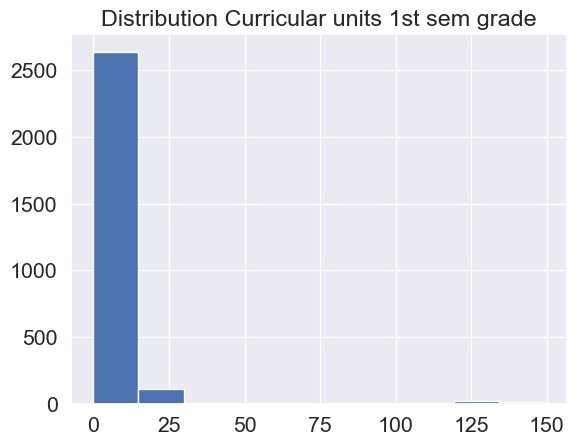

In [92]:
plt.title('Distribution Curricular units 1st sem grade')
plt.hist(df.Curricular_units_1st_sem_grade)
plt.show()

In [93]:
df.Curricular_units_1st_sem_grade.mode()

0    0.0
Name: Curricular_units_1st_sem_grade, dtype: float64

diketahui berdasarkan distribusinya, kebanyakan data bernilai 0.0, sehingga kita bisa mengganti nilai NaN menjadi 0.0

In [94]:
df.Curricular_units_1st_sem_grade.fillna(0.0, inplace=True)

C:\Users\rizqr\AppData\Local\Temp\ipykernel_14152\2552272255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Curricular_units_1st_sem_grade.fillna(0.0, inplace=True)


In [95]:
df.Curricular_units_1st_sem_grade.isna().sum()

0

sekarang tidak ada lagi NaN value pada column 'Curricular_units_1st_sem_grade'

### Memperbaiki data pada column 'Curricular_units_2nd_sem_grade'

In [96]:
df.Curricular_units_2nd_sem_grade.value_counts()

Curricular_units_2nd_sem_grade
0.0                       870
12.0                      170
11.0                      165
13.0                      150
11.5                       86
                         ... 
14.622.222.222.222.200      1
13.994.444.444.444.400      1
11.685.714.285.714.200      1
15.657.142.857.142.800      1
11.083.333.333.333.300      1
Name: count, Length: 785, dtype: int64

column 'Curricular_units_2nd_sem_grade' masih memiliki nilai yang sangat besar, sehingga kita perlu memanipulasinya

In [97]:
def titik_format(x):
    count = 0
    for r in x:
        if r == '.':
            count += 1
    if count == 1:
        return float(x)
    else:
        return np.nan


df.Curricular_units_2nd_sem_grade = df.Curricular_units_2nd_sem_grade.apply(lambda x: titik_format(x))

manipulasi data yang memiliki jumlah yang besar menjadi NaN

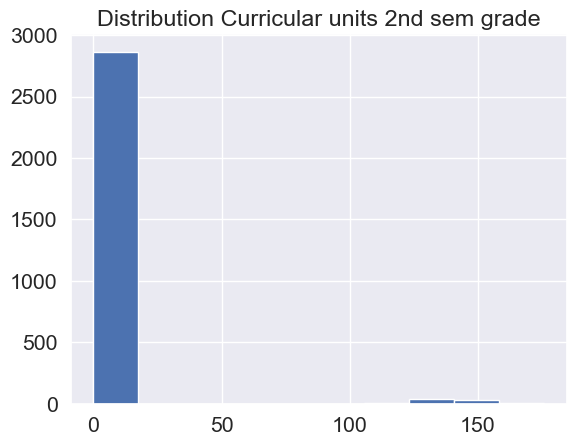

In [98]:
plt.title('Distribution Curricular units 2nd sem grade')
plt.hist(df.Curricular_units_2nd_sem_grade)
plt.show()

In [99]:
df.Curricular_units_2nd_sem_grade.mode()

0    0.0
Name: Curricular_units_2nd_sem_grade, dtype: float64

In [100]:
df.Curricular_units_2nd_sem_grade.fillna(0.0, inplace=True)

C:\Users\rizqr\AppData\Local\Temp\ipykernel_14152\1671455955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Curricular_units_2nd_sem_grade.fillna(0.0, inplace=True)


In [101]:
df.Curricular_units_2nd_sem_grade.isna().sum()

0

berdasarkan distribusinya dan nilai terbanyak, diketahui bahwa 0.0 merupakan nilai yang layak untuk mengisi NaN pada column 'Curricular_units_2nd_sem_grade'

In [102]:
df[['Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Curricular_units_1st_sem_grade  4424 non-null   float64
 1   Curricular_units_2nd_sem_grade  4424 non-null   float64
dtypes: float64(2)
memory usage: 69.3 KB


setelah merubah data dengan nilai yang besar, tipe data dari kedua kolom tsb berubah menjadi float64, sesuai dengan keinginan kita.

### Exploratory Data Analysis (EDA)

#### Explore...

Jaya Jaya Institut merupakan perguruan tinggi yang telah mencetak banyak lulusan yang sangat baik, akan tetapi terdapat siswa yang dropout dengan jumlah yang terbilang tidak sedikit. Exploratory data analysis membantu untuk mencari penyebab mengapa terdapat banyak siswa yang dropout.

Berdasarkan penjelasan tersebut muncul 3 pertanyaan:

1. Bagaimana persentase antara siswa yang menerima Scholarship dan siswa yang mengambil debt?
2. Bagaimana deskripsi siswa di Jaya Jaya Institut? Berapa rata-rata umurnya saat mendaftar? bagaimana status dari siswanya?
3. Bagaimana progress perkembangan nilai siswa dari semester satu hingga semester dua?

In [103]:
df['Status'] = df['Status'].apply(lambda x: 'Non-Dropout' if x != 'Dropout' else x)

mengubah status siswa yang tidak Dropout menjadi Non-Dropout, hal ini dilakukan untuk melihat pattern dari datanya.

In [104]:
df.Status.value_counts()

Status
Non-Dropout    3003
Dropout        1421
Name: count, dtype: int64

diketahui bahwa jumlah siswa yang Non-Dropout lebih banyak akan tetapi jumlah siswa yang Dropout hampir setengah dari Non-Dropout.

In [105]:
df['Scholarship_holder'] = df['Scholarship_holder'].apply(lambda x: 'No' if x == 0 else 'Yes')

In [106]:
df['Debtor'] = df['Debtor'].apply(lambda x: 'No' if x == 0 else 'Yes')

mengubah data pada kolom 'Scholarship_holder' & 'Debtor' menjadi kategorikal, untuk memudahkan pembacaan data.

#### 1. Bagaimana persentase antara siswa yang menerima Scholarship dan siswa yang mengambil debt?

In [107]:
scholarship_counts = df.Scholarship_holder.value_counts()
debtor = df.Debtor.value_counts()

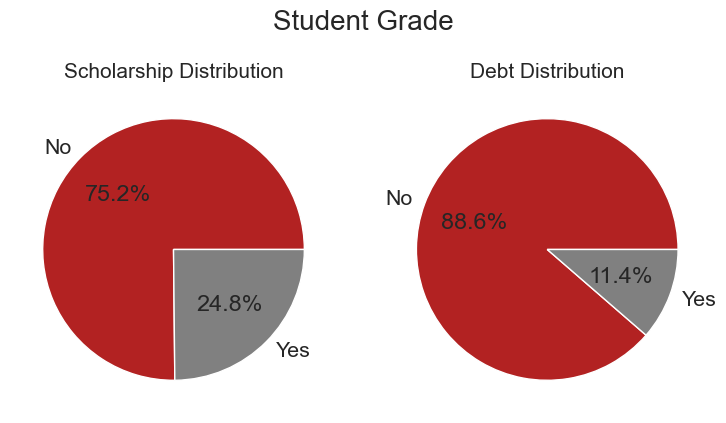

In [108]:
plt.figure(figsize=(8,5))
colors = ['firebrick', 'grey']
title = ['Scholarship Distribution', 'Debt Distribution']

for n in range(2):
    if n == 0:
        data = scholarship_counts
    else:
        data = debtor
        
    plt.subplot(1,2, 1+n)
    plt.title(title[n], fontsize=15)
    plt.pie(data, labels=data.index, colors=colors, autopct="%1.1f%%")
    
    plt.tight_layout(pad=2.0)

plt.suptitle('Student Grade', fontsize=20)
plt.show()

melalui pie chart diatas dijelaskan bahwa kebanyakan siswa tidak mendapatkan beasiswa dan hanya sedikit siswa yang menghutang, sehingga diketahui kebanyakan siswa di Jaya Jaya Institut mandiri dalam pembayaran sekolahnya.

#### 2. Bagaimana deskripsi siswa di Jaya Jaya Institut? Berapa rata-rata umurnya saat mendaftar? bagaimana status dari siswanya?

In [109]:
def status_format(x):
    if x == 2 or x == 5:
        return 'Couple'
    else:
        return 'Single'
    
df.Marital_status = df.Marital_status.apply(lambda x: status_format(x))

menipulasi column Marital_status menjadi 2 value, yaitu single dan couple, sehingga dapat memudahkan analisi dan pemahaman data

In [110]:
status_bar = df.Marital_status.value_counts()

status_bar

Marital_status
Single    4020
Couple     404
Name: count, dtype: int64

In [111]:
student_status = df.groupby(by=['Status']).agg({
    'Age_at_enrollment': 'mean',
}).reset_index()

student_status

,Status,Age_at_enrollment
0,Dropout,26.068966
1,Non-Dropout,21.938395


C:\Users\rizqr\AppData\Local\Temp\ipykernel_14152\2942703116.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(data=student_status, x='Status', y='Age_at_enrollment', palette=['red', 'gray'])
C:\Users\rizqr\AppData\Local\Temp\ipykernel_14152\2942703116.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_bar.index, y=status_bar.values, palette=['red', 'gray'])


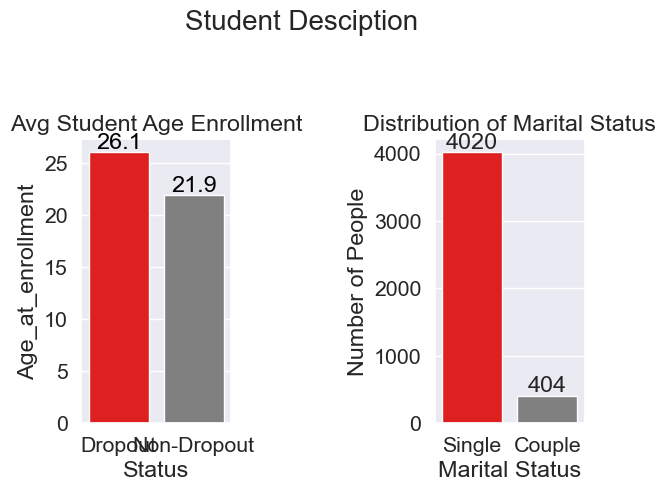

In [112]:
plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
graph = sns.barplot(data=student_status, x='Status', y='Age_at_enrollment', palette=['red', 'gray'])
for i in graph.containers:
        graph.bar_label(i, color='black', fmt = '%.1f')
plt.title('Avg Student Age Enrollment')

plt.subplot(1,2,2)
sns.barplot(x=status_bar.index, y=status_bar.values, palette=['red', 'gray'])
plt.xlabel("Marital Status")
plt.ylabel("Number of People")
for i, v in enumerate(status_bar.values):
    plt.text(i, v + 0.1, str(v), va='bottom', ha='center')
plt.title("Distribution of Marital Status")

plt.tight_layout(pad=5.0)
plt.suptitle('Student Desciption', fontsize=20)
plt.show() 

Berdasarkan 2 barchart diatas, diketahui bahwa kebanyakan siswa masih berstatus single, hanya sedikit yang telah memiliki pasangan. Berdasarkan chart data pendaftaran, diketahui bahwa rata-rata siswa mendaftar pada 26.1 sangat dimungkinkan untuk dropout, sedangkan siswa yang rata-rata usianya mendaftar pada usia 21.9 tidak dropout.

#### 3. Bagaimana progress perkembangan nilai siswa dari semester satu hingga semester dua?

In [113]:
student_grade =  df.groupby(by=['Status']).agg({
    'Curricular_units_1st_sem_grade': 'mean',
    'Curricular_units_2nd_sem_grade': 'mean',
}).reset_index()

student_grade 

,Status,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade
0,Dropout,5.375705,4.773953
1,Non-Dropout,7.613169,9.822772


C:\Users\rizqr\AppData\Local\Temp\ipykernel_14152\2987067814.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(data=student_grade, x='Status', y=level[n], palette=colors)
C:\Users\rizqr\AppData\Local\Temp\ipykernel_14152\2987067814.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(data=student_grade, x='Status', y=level[n], palette=colors)


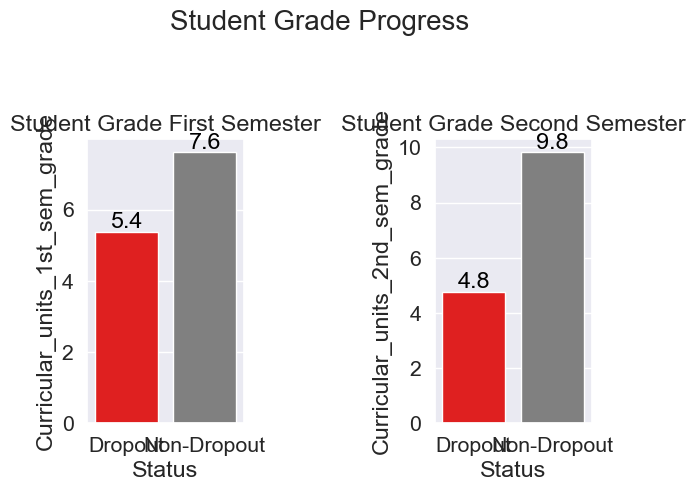

In [114]:
plt.figure(figsize=(8,6))
colors = ['red', 'grey']
title = ['Student Grade First Semester', 'Student Grade Second Semester']
level = ['Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']

for n in range(2):
    plt.subplot(1,2, 1+n)
    plt.title(title[n])
    graph = sns.barplot(data=student_grade, x='Status', y=level[n], palette=colors)
    
    plt.tight_layout(pad=5.0)

    for i in graph.containers:
        graph.bar_label(i, color='black', fmt = '%.1f')

plt.suptitle('Student Grade Progress', fontsize=20)
plt.show()

melalui dua barchart diatas yang mengambarkan semester pertama dan semester kedua, diketahui bahwa siswa yang dropout memiliki rata-rata nilai yang menurun, sedangkan siswa yang sudah lulus atau masih belajar memiliki nilai yang berkembang. 

#### Kesimpulan

Melalui 3 pertanyaan tersebut, saya menyimpulkan bahwa kebanyakan siswa yang bersekolah di Jaya Jaya Institut menanggung biayanya sendiri serta tidak menggunakan beasiswa ataupun hutang untuk pendidikannya. 

Kemudian, diketahui status dari siswa di Jaya Jaya Institut masih single dan hanya sedikit yang memiliki pasangan, yang artinya siswa masih tidak memiliki tanggungan, lalu siswa yang berstatus dropout memiliki rata-rata umurnya yaitu 26.1 dan siswa yang sudah lulus/masih belajar mendaftar di usia yang lebih muda yaitu 21.9 tahun.

Siswa yang dropout memiliki nilai yang cenderung menurun, sedangkan siswa yang masih sekolah/sudah lulus cenderung meningkat dalam nilainya, itulah perbedaan yang mendasar antara siswa yang dropout dan siswa yang tidak dropout.

#### Preprocessing untuk machine learning

Mengembangkan model machine learning untuk memprediksi apakah siswa akan *Dropout* atau *Non-Dropout*, dikarenakan label yang dimiliki hanya dua, logistic regression adalah algoritma machine learning yang akan digunakan.

In [115]:
new_df = df[['Gender', 'Marital_status', 'Age_at_enrollment', 'Scholarship_holder', 'Debtor', 
             'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade', 'Status']]

In [116]:
new_df.sample(3)

,Gender,Marital_status,Age_at_enrollment,Scholarship_holder,Debtor,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status
1800,1,Single,18,No,No,12.288,12.288,Dropout
2462,1,Single,18,No,No,0.000,0.000,Dropout
3596,1,Single,22,No,No,0.000,12.750,Non-Dropout


Dataframe baru yang digunakan untuk memprediksi siswa nantinya

Mengubah kolom kategori menjadi numerik, karena machine learning hanya bisa membaca angka.

In [117]:
new_df.Status = new_df.Status.apply(lambda x: 1 if x == 'Dropout' else 0)

C:\Users\rizqr\AppData\Local\Temp\ipykernel_14152\1383550398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.Status = new_df.Status.apply(lambda x: 1 if x == 'Dropout' else 0)


In [118]:
new_df['Marital_status'] = new_df.Marital_status.apply(lambda x: 1 if x == 'Single' else 0)

C:\Users\rizqr\AppData\Local\Temp\ipykernel_14152\2168252413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Marital_status'] = new_df.Marital_status.apply(lambda x: 1 if x == 'Single' else 0)


In [119]:
new_df['Scholarship_holder'] = new_df.Scholarship_holder.apply(lambda x: 1 if x == 'Yes' else 0)

C:\Users\rizqr\AppData\Local\Temp\ipykernel_14152\2854495353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Scholarship_holder'] = new_df.Scholarship_holder.apply(lambda x: 1 if x == 'Yes' else 0)


In [120]:
new_df['Debtor'] = new_df['Debtor'].apply(lambda x: 1 if x == 'Yes' else 0)

C:\Users\rizqr\AppData\Local\Temp\ipykernel_14152\1005163954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Debtor'] = new_df['Debtor'].apply(lambda x: 1 if x == 'Yes' else 0)


In [121]:
new_df.sample(3)

,Gender,Marital_status,Age_at_enrollment,Scholarship_holder,Debtor,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status
702,1,1,43,0,0,13.875,12.5,1
3769,0,1,18,1,0,0.000,13.2,1
149,0,1,20,1,0,0.000,0.0,0


Tiga sample pada Dataframe baru serta semua data telah menjadi numerik

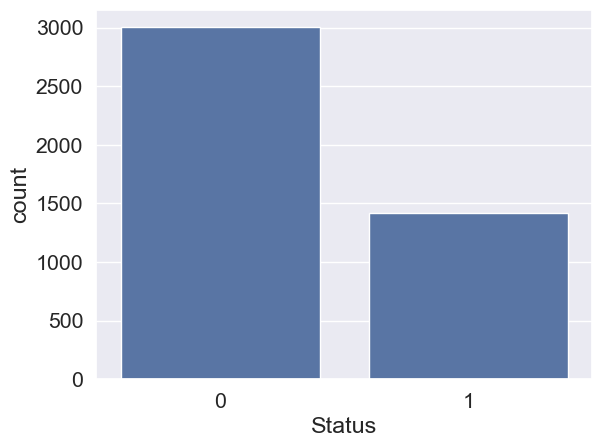

In [122]:
sns.countplot(data=new_df, x="Status")
plt.show()

Terjadi ketimpangan data pada labelnya, sehingga kita perlu melakukan sampling untuk menyetarakan data & menormalisasikan data

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [124]:
train_df, test_df = train_test_split(new_df, test_size=0.15, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
 
print(train_df.shape)
print(test_df.shape)

(3760, 8)
(664, 8)


Membagi Dataframe menjadi train dan test dengan porsi 85% untuk train dan 15% untuk test

In [125]:
train_df.Status.value_counts()

Status
0    2576
1    1184
Name: count, dtype: int64

detail ketimpangan hasil pada labelnya, sehingga perlu menyamakan data labelnya dengan status *Non-Dropout* yang 2576 menjadi 1184

In [126]:
df_majority_1 = train_df[(train_df.Status == 0)]
df_minority = train_df[(train_df.Status == 1)]

Membagi data menjadi dua sesuai dengan labelnya

In [127]:
from sklearn.utils import resample

df_majority_1_undersampled = resample(df_majority_1, n_samples=1184, random_state=42)

print(df_majority_1_undersampled.shape)

(1184, 8)


Melakukan sampling dengan mengambil data sebanyak 1184 dari Dataframe dengan status *Non-Dropout*

In [128]:
from sklearn.utils import shuffle
 
undersampled_train_df = pd.concat([df_minority, df_majority_1_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Gender,Marital_status,Age_at_enrollment,Scholarship_holder,Debtor,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status
1145,0,1,18,0,0,12.0,13.25,0
726,0,1,55,0,0,10.0,12.00,1
897,1,1,23,0,0,11.0,0.00,1
1016,0,1,34,0,1,0.0,12.50,0
1196,0,0,50,0,0,0.0,0.00,1


Melakukan join 2 Dataframe yang sebelumnya terpisah antara *Non-Dropout* dan *Dropout* menjadi satu

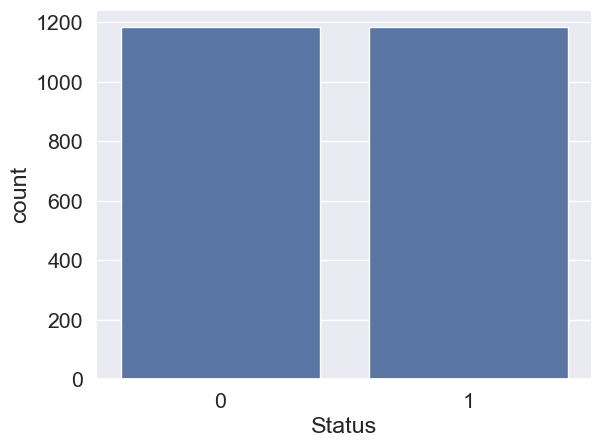

In [129]:
sns.countplot(data=undersampled_train_df, x="Status")
plt.show()

Visualisasi countplot diatas menjelaskan bahwa label telah memiliki jumlah data yang sama

In [130]:
x_train = undersampled_train_df.drop(columns="Status", axis=1)
y_train = undersampled_train_df['Status']

x_test = test_df.drop(columns="Status", axis=1)
y_test = test_df['Status']

Memecah Dataframe train dan test antara feature dan label

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
col = ['Gender', 'Marital_status', 'Age_at_enrollment', 'Scholarship_holder', 'Debtor', 
             'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']

In [133]:
x_train[col].sample(3)

,Gender,Marital_status,Age_at_enrollment,Scholarship_holder,Debtor,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade
1788,1,1,20,0,1,12.20,0.00
1646,0,1,19,1,0,12.86,12.86
1010,0,1,18,0,0,12.86,12.86


In [134]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train[col] = scaler.transform(x_train[col])

Normalisasi feature menggunakan MinMaxScaler, sehingga data pada feature hanya bernilai 0-1

In [135]:
x_train.sample(3)

,Gender,Marital_status,Age_at_enrollment,Scholarship_holder,Debtor,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade
891,0.0,1.0,0.018868,0.0,0.0,0.000000,0.070862
1757,1.0,1.0,0.018868,0.0,1.0,0.067058,0.000000
149,1.0,1.0,0.018868,0.0,0.0,0.079128,0.074592


Data yang telah dinormalisasikan dan telah memiliki label yang sama

## Modelling

In [136]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

Modeling train data menggunakan algoritma logistic regression

## Evaluation

In [137]:
from sklearn.metrics import classification_report, confusion_matrix

In [138]:
predictions = logmodel.predict(x_test)
conf_m = classification_report(y_test, predictions, target_names=label)
print(conf_m)

              precision    recall  f1-score   support

 Non-Dropout       0.79      0.33      0.46       427
     Dropout       0.41      0.85      0.55       237

    accuracy                           0.51       664
   macro avg       0.60      0.59      0.51       664
weighted avg       0.66      0.51      0.49       664



melalui confusion matrix, diketahui model yang dikembangkan mendapatkan akurasi sebesar **51%**

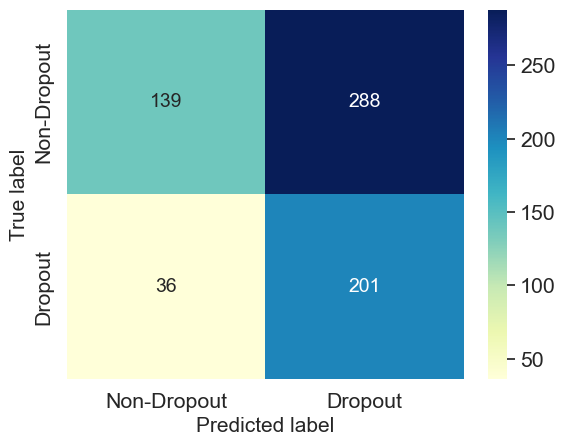

In [139]:
predictions = logmodel.predict(x_test)
conf_m = confusion_matrix(y_test, predictions)

label = ['Non-Dropout', 'Dropout']
sns.heatmap(conf_m, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu', 
            xticklabels=label, yticklabels=label)
plt.ylabel('True label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
plt.show()

Berikut merupakan hasil evaluasi dari modelnya:
- 139 adalah jumlah negatif sebenarnya (TN), yang berarti negatif sebenarnya yang diklasifikasikan dengan benar sebagai negatif.
- 201 adalah jumlah positif sebenarnya (TP), yang berarti positif sebenarnya yang diklasifikasikan dengan benar sebagai positif.
- 36 adalah jumlah negatif palsu (FN), yang berarti positif sebenarnya yang diklasifikasikan secara salah sebagai negatif.
- 288 adalah jumlah positif palsu (FP), yang berarti negatif sebenarnya yang diklasifikasikan secara salah sebagai positif.

export model logistic regression

In [140]:
# import joblib
# joblib.dump(logmodel, 'model.pkl')